# Multiple Linear Regression from scratch 

After finishing one of the courses I want to recap wy knowledge and implement Multiple Linear Regression from scratch.


At first let`s import all libraries that we need for this task:

In [172]:
import numpy as np
import matplotlib.pyplot as plt

Now let's remember Multiple Linear Regression\`s formula:
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b $$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b   $$ 
where $\cdot$ is a vector \`dot product\`

In [173]:
X = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y = np.array([460, 232, 178])

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

In [174]:
def cost_function(X,y,w,b):
    m = X.shape[0]
    total_cost = 0
    for i in range(m):
        error = (np.dot(X[i],w)+b)-y[i]
        total_cost += error**2
    return total_cost/(2*m)

Gradient (partial derivatives) are calucated using this formulas:

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}   \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [175]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dJ_db = 0
    dJ_dw = np.zeros_like(X[0])
    for i in range(m):
        error = (np.dot(X[i],w)+b)-y[i]
        for j in range(n):
            dJ_dw[j]+= error*X[i,j]
        dJ_db += error
    dJ_db =dJ_db/ m
    dJ_dw =dJ_dw /m 
    return dJ_db, dJ_dw

Gradient descent for multiple variables - repeat iteratively until convergence:

$$\begin{align*}
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline
\end{align*}$$


In [176]:
def gradient_descent(X,y,w,b,epsilon,alpha):
    old_cost = cost_function(X,y,w,b)
    convergence = False
    J_history = []
    while convergence == False:
        dJ_db, dJ_dw = compute_gradient(X,y,w,b)
        temp_w = w - alpha*dJ_dw
        temp_b = b - alpha*dJ_db
        new_cost = cost_function(X,y,temp_w,temp_b)
        
        if old_cost - new_cost <= epsilon:
            convergence = True
        else:
            old_cost = new_cost
            w = temp_w
            b = temp_b
        J_history.append( cost_function(X, y, w, b))
    return b,w,J_history

Let's make z-score normalization to our features. All features will have a mean of 0 and a standard deviation of 1.
Z-score normalization is implemented using this this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} $$ 

In [177]:
def z_score_normalizaton(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm

Now we can find our $w$ and $b$ parameters and also find out - what is the final cost:

In [178]:
X = z_score_normalizaton(X)
w = np.zeros_like(X[0])
b = 0.
epsilon = 1e-1
alpha = 1e-2
b,w,J_hist_1 = gradient_descent(X,y,w,b,epsilon,alpha)

print('b',b)
print('w',w)
print('cost',J_hist_1[-1])

b 286.8505438444355
w [ 38.06978272  41.52501437 -30.71694982  36.37552505]
cost 4.997764131768062


Text(0.5, 0, 'iteration step')

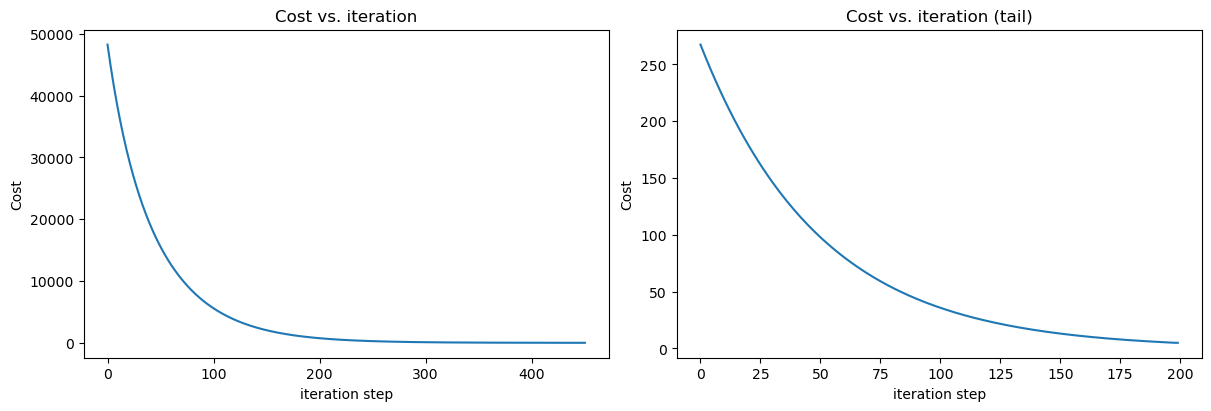

In [179]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist_1)
ax2.plot(J_hist_1[-200:])
ax1.set_title("Cost vs. iteration")
ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step') 

Let's make all previously made operations, but also implement some regularization.
The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 


In [180]:
def cost_function_reg(X,y,w,b,lambda_):
    m,n = X.shape
    total_cost = 0
    reg_cost = 0
    for i in range(m):
        error = (np.dot(X[i],w)+b)-y[i]
        total_cost += error**2
    total_cost/=(2*m)
    
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost = (lambda_/(2*m)) * reg_cost
    total_cost = total_cost + reg_cost
    
    return total_cost

The gradient calculation with regularization for linear regression:

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j 
\end{align*}$$


In [181]:
def compute_gradient_reg(X,y,w,b,lambda_):
    m,n = X.shape
    dJ_db = 0
    dJ_dw = np.zeros_like(X[0])
    for i in range(m):
        error = (np.dot(X[i],w)+b)-y[i]
        for j in range(n):
            dJ_dw[j]+= error*X[i,j]
        dJ_db += error
    dJ_db =dJ_db/ m
    dJ_dw =dJ_dw /m
    
    for j in range(n):
        dJ_dw[j] = dJ_dw[j]+w[j]*(lambda_/m)
    
    return dJ_db, dJ_dw

In [182]:
def gradient_descent_reg(X,y,w,b,epsilon,alpha,lambda_):
    old_cost = cost_function_reg(X,y,w,b,lambda_)
    convergence = False
    J_history = []
    while convergence == False:
        dJ_db, dJ_dw = compute_gradient_reg(X,y,w,b,lambda_)
        temp_w = w - alpha*dJ_dw
        temp_b = b - alpha*dJ_db
        new_cost = cost_function_reg(X,y,temp_w,temp_b,lambda_)
        
        if old_cost - new_cost <= epsilon:
            convergence = True
        else:
            old_cost = new_cost
            w = temp_w
            b = temp_b
        J_history.append(cost_function_reg(X, y, w, b,lambda_))
    return b,w,J_history

Now we can find our $w$ and $b$ parameters and also find out - what is the final cost of a regularized Linear Regression:

In [183]:
w = np.zeros_like(X[0])
b = 0.
epsilon = 1e-1
alpha = 1e-2
lambda_ = 0.5
b,w,J_hist_2 = gradient_descent_reg(X,y,w,b,epsilon,alpha,lambda_)
print('b',b)
print('w',w)
print('cost',J_hist_2[-1])

b 286.8505438444355
w [ 36.2059872   39.18794027 -26.92360606  34.72559463]
cost 430.3782786634443


Text(0.5, 0, 'iteration step')

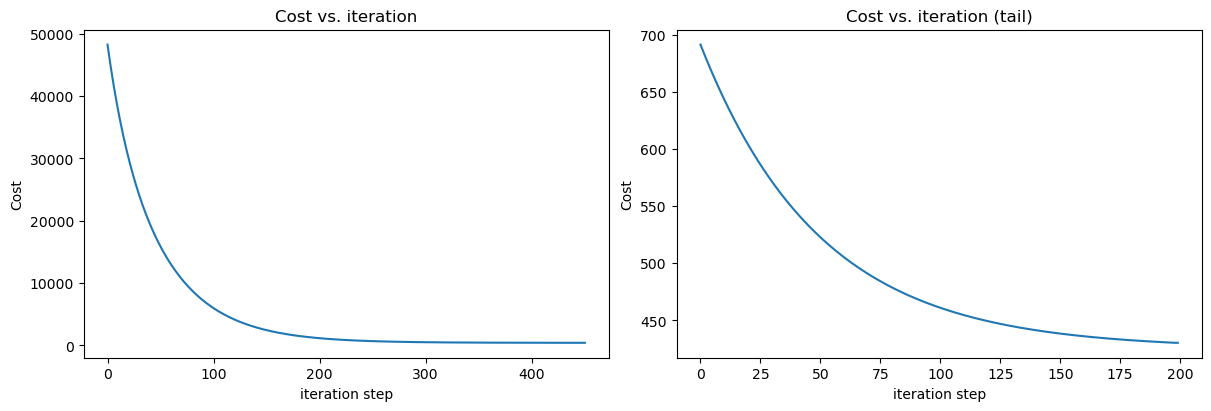

In [184]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist_2)
ax2.plot(J_hist_2[-200:])
ax1.set_title("Cost vs. iteration")
ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step') 

Look's like it works properly. If someone will find any errors - I'll be grateful to see the remarks in the comments.